In [1]:
# Used for data manipulation
import pandas as pd

# Used for visualization
import seaborn as sb
import matplotlib.pyplot as plt

# Used for wordcloud visualization
!pip install wordcloud
from wordcloud import WordCloud

In [2]:
# Loading all data
all_data=pd.read_csv("data/alldata.csv")
all_data.head()

,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"


In [3]:
# Checking for NA values
print(all_data.position.isnull().value_counts())
print(all_data.company.isnull().value_counts())
print(all_data.description.isnull().value_counts())
print(all_data.reviews.isnull().value_counts())
print(all_data.location.isnull().value_counts())

False    6953
True       11
Name: position, dtype: int64
False    6953
True       11
Name: company, dtype: int64
False    6953
True       11
Name: description, dtype: int64
False    5326
True     1638
Name: reviews, dtype: int64
False    6953
True       11
Name: location, dtype: int64


In [4]:
# Filling NA values for reviews column, dropping those for other columns
all_data["reviews"]=all_data["reviews"].fillna("0")
all_data=all_data.dropna(subset=["position",'company','description',"location"])

In [5]:
# Splitting City column from Location column
all_data["city"]=all_data.location.str.split(',',expand=True).iloc[:,0]
all_data.head()

,position,company,description,reviews,location,city
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,0,"Atlanta, GA 30301",Atlanta
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",0,"Atlanta, GA",Atlanta
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",0,"Atlanta, GA",Atlanta
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44,"Atlanta, GA 30303",Atlanta
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550,"Atlanta, GA",Atlanta


In [6]:
# Calculating total number of job postings by company
jobs_by_company=all_data.groupby(by=["company"]).size().reset_index(name="Positions").sort_values(by="Positions",ascending=False)

(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 <a list of 9 Text xticklabel objects>)

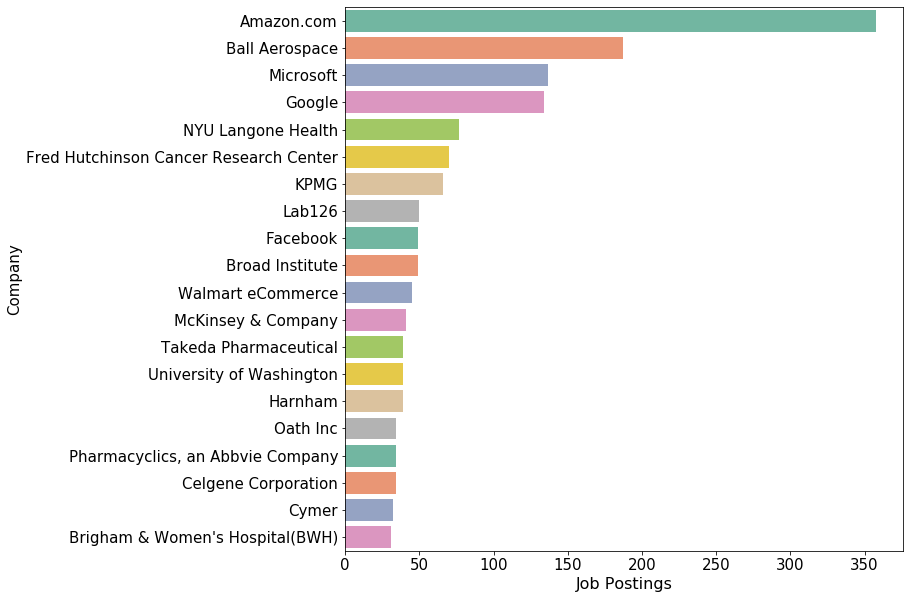

In [7]:
# Plotting top 20 companies with the most job openings related to data science field
plt.figure(figsize=(10,10))
sb.barplot(y="company",x="Positions",data=jobs_by_company.head(20),palette="Set2",errwidth=30,ci=1000)
plt.yticks(size=15)
plt.ylabel("Company",size=15)
plt.xlabel("Job Postings",size=16)
plt.xticks(size=15)

In [52]:
%matplotlib inline

# For simplicity purposes, we will examine only top 10 positions related to data science
top_pos = pd.DataFrame(all_data.position.value_counts()[:10])

In [53]:
# Reassigning positions put as the index of rows
top_pos["Position"]=top_pos.index

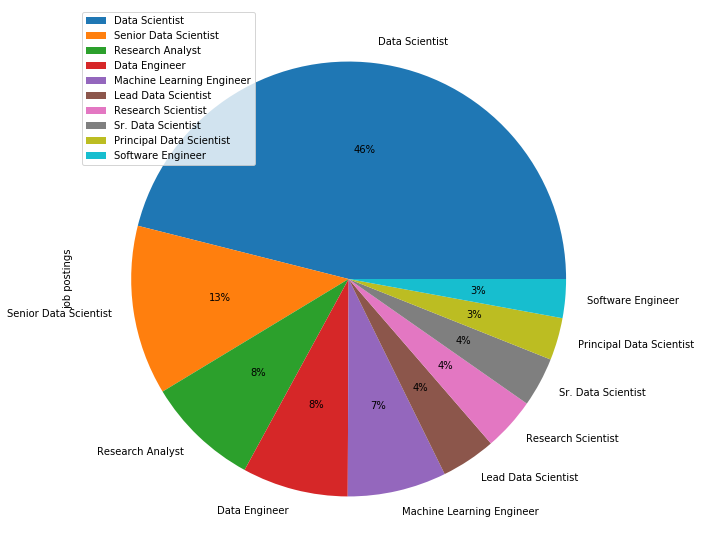

In [54]:
# Renaming columns as position and job postings
top_pos=top_pos.rename(columns={'position':'job postings'})

# Plotting positions and the volume of job postings in a pie chart
top_pos.plot.pie(y="job postings",figsize=(50,10),autopct='%1.0f%%')
plt.legend(loc="upper left")

(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 <a list of 9 Text xticklabel objects>)

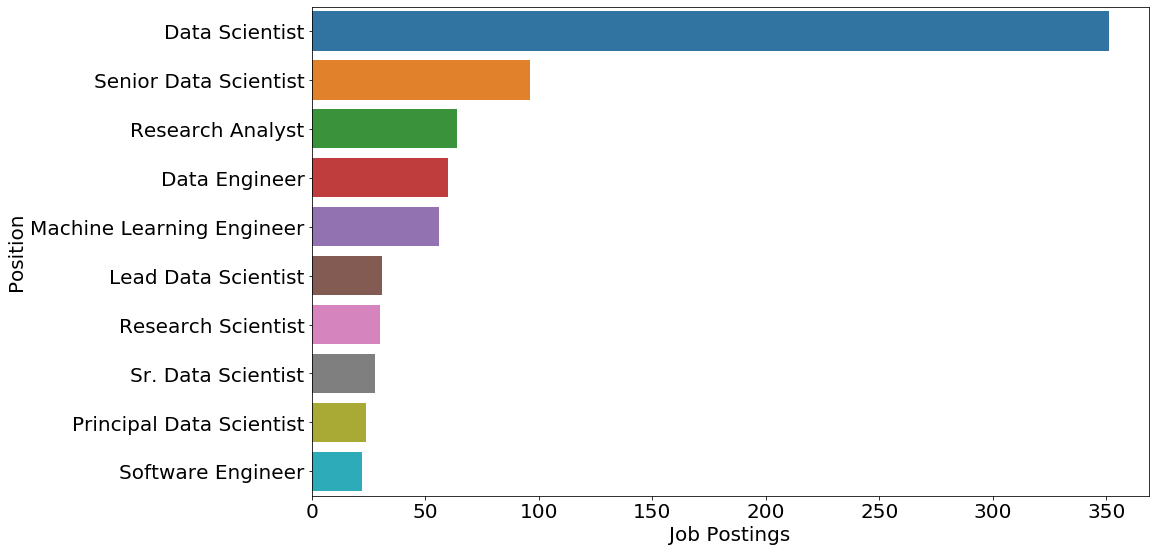

In [55]:
# Plotting descending total number of job postings by position
plt.figure(figsize=(15,9))
sb.barplot(x="job postings",y="Position",data=top_pos)
plt.yticks(size=20)
plt.ylabel("Position",size=20)
plt.xlabel("Job Postings",size=20)
plt.xticks(size=20)

In [12]:
# Examining total job openings by city
total_by_city= all_data.groupby(by="city").size().reset_index(name="job postings").sort_values(by="job postings",ascending=False)
total_by_city.head()

,city,job postings
48,New York,848
75,Seattle,777
13,Cambridge,694
8,Boston,629
69,San Francisco,564


(array([  0., 100., 200., 300., 400., 500., 600., 700., 800., 900.]),
 <a list of 10 Text xticklabel objects>)

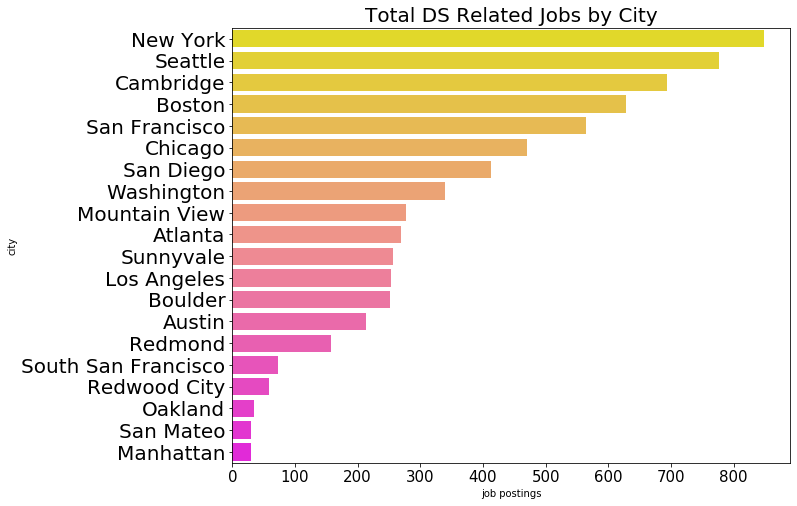

In [13]:
# Plot total job openings by state
plt.figure(figsize=(10,8))
plt.yticks(size=20)
sb.barplot(y="city",x="job postings",data=total_by_city.head(20), palette="spring_r")
plt.title("Total DS Related Jobs by City",size=20)
plt.xticks(size=15)

In [14]:
# Define data scientists as Data Scientist + Senior Data Scientist + Lead Data Scientist + Sr. Data Scientist
data_scientists=all_data[(all_data["position"]=='Data Scientist')|(all_data["position"]=='Senior Data Scientist')|(all_data["position"]=='Lead Data Scientist')|(all_data["position"]=='Sr. Data Scientist')]



In [15]:
# Examine data scientists by city
ds_by_city=data_scientists.groupby(by="city").size().reset_index(name="job postings").sort_values(by="job postings",ascending=False)

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 <a list of 8 Text xticklabel objects>)

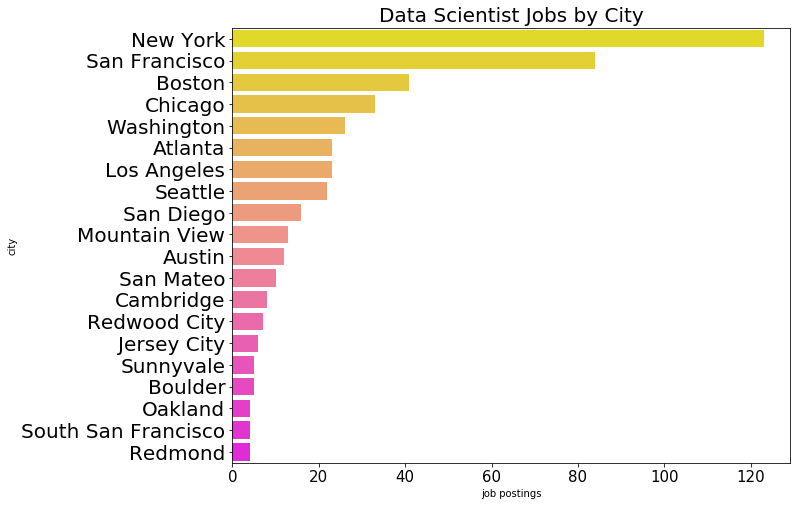

In [16]:
# Bar Plot Data Scientist Jobs by City (top20)
plt.figure(figsize=(10,8))
plt.yticks(size=20)
sb.barplot(y="city",x="job postings",data=ds_by_city.head(20),palette="spring_r")
plt.title("Data Scientist Jobs by City",size=20)
plt.xticks(size=15)

In [17]:
# Define a function to extract the words
def desc_to_text(texts):
    wordlist=[]
    for desc in texts:
        wordlist.append(desc.split())
    new_list=[]
    for x in wordlist:
        new_list=new_list+x
    text=" ".join(new_list)
    return text 

In [18]:
# Putting all data scientist job posting descriptions in a list
data_scientists_skills=data_scientists.description.tolist()

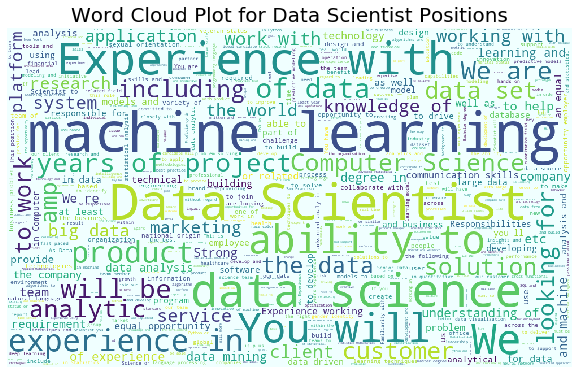

In [19]:
# Generating and plotting wordcloud for data scientist job postings
wordcloud = WordCloud(width = 1000, height = 600, background_color ='azure', max_words=500, min_font_size = 5).generate(desc_to_text(data_scientists_skills))
plt.figure(figsize=(20,5))
plt.imshow(wordcloud)
plt.title('Word Cloud Plot for Data Scientist Positions',size=20)
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()

In [20]:
# Calculating Percentages of job posting requiring specified skills (sql, python, java, ml) for data scientists, if they appear in the description
python_ds=data_scientists[data_scientists.description.str.contains("python|Python|PYTHON")].shape[0]/data_scientists.shape[0]*100
sql_ds=data_scientists[data_scientists.description.str.contains("SQL|sql")].shape[0]/data_scientists.shape[0]*100
java_ds=data_scientists[data_scientists.description.str.contains("java|Java|JAVA")].shape[0]/data_scientists.shape[0]*100
ml_ds=data_scientists[data_scientists.description.str.contains("machine|learning|ml|ML|machine Learning|Machine Learning|Machine learning")].shape[0]/data_scientists.shape[0]*100


In [21]:
# Skill_list to be used for values
skill_list_ds=[python_ds,sql_ds,java_ds,ml_ds]

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.]),
 <a list of 10 Text yticklabel objects>)

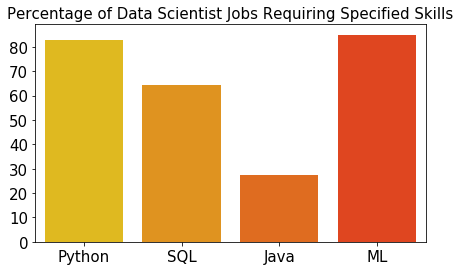

In [22]:
# Plotting percentages of job postings requiring specified skills
plt.figure(figsize=(7,4))
sb.barplot(y=skill_list_ds,x=["Python","SQL","Java","ML"],palette="autumn_r")
plt.title("Percentage of Data Scientist Jobs Requiring Specified Skills",size=15)
plt.xticks(size=15)
plt.yticks(size=15)

In [23]:
# Define ML Engineer Position
ml_engineer=all_data[(all_data["position"]=='Machine Learning Engineer')]

In [26]:
# Examine ML Engineers by city
ml_by_city=ml_engineer.groupby(by="city").size().reset_index(name="job postings").sort_values(by="job postings",ascending=False)

,city,job postings
10,San Francisco,14
1,Boston,8
6,New York,7
11,Seattle,7
4,Los Angeles,4
5,Mountain View,4
8,Redmond,3
7,Oakland,2
12,Sunnyvale,2
0,Austin,1


(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16.]),
 <a list of 9 Text xticklabel objects>)

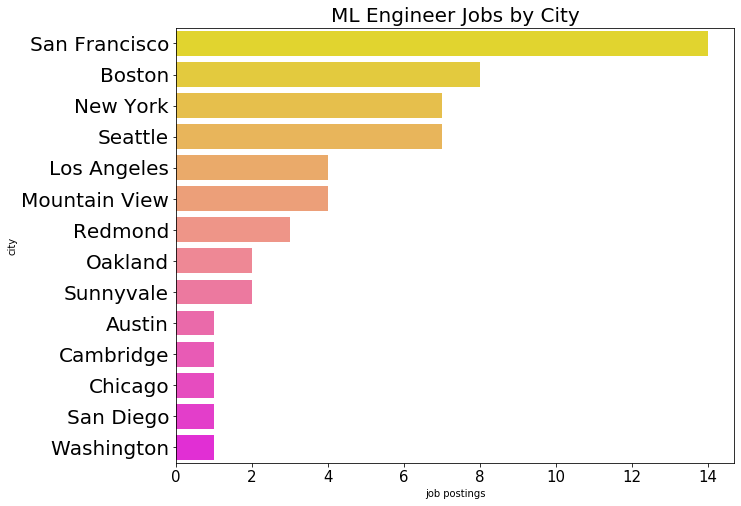

In [25]:
# Bar Plot ML Engineer Jobs by City (top20)
plt.figure(figsize=(10,8))
plt.yticks(size=20)
sb.barplot(y="city",x="job postings",data=ml_by_city.head(20),palette="spring_r")
plt.title("ML Engineer Jobs by City",size=20)
plt.xticks(size=15)

In [29]:
# Putting ml engineer job posting descriptions in a list
ml_engineer_skills=ml_engineer.description.tolist()

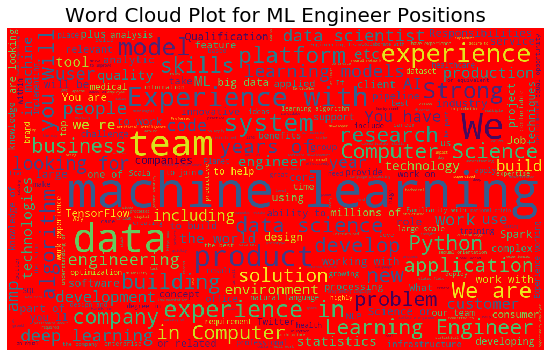

In [31]:
# Generating and plotting wordcloud for ml engineer job postings
wordcloud = WordCloud(width = 1000, height = 600, background_color ='red', contour_color='steelblue', max_words=300, min_font_size = 5).generate(desc_to_text(ml_engineer_skills))
plt.figure(figsize=(20,5))
plt.imshow(wordcloud)
plt.title('Word Cloud Plot for ML Engineer Positions',size=20)
plt.tight_layout(pad = 0) 
plt.axis("off")
plt.show()

In [32]:
# Calculating Percentages of job posting requiring specified skills (sql, python, java, ml) for ml engineers, if they appear in the description
python_mleng=ml_engineer[ml_engineer.description.str.contains("python|Python|PYTHON")].shape[0]/ml_engineer.shape[0]*100
sql_mleng=ml_engineer[ml_engineer.description.str.contains("SQL|sql")].shape[0]/ml_engineer.shape[0]*100
java_mleng=ml_engineer[ml_engineer.description.str.contains("java|Java|JAVA")].shape[0]/ml_engineer.shape[0]*100
ml_mleng=ml_engineer[ml_engineer.description.str.contains("machine|learning|ml|ML|machine Learning|Machine Learning|Machine learning")].shape[0]/ml_engineer.shape[0]*100


In [33]:
# Skill_list to be used for values
skill_list_mleng=[python_mleng,sql_mleng,java_mleng,ml_mleng]

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 7 Text yticklabel objects>)

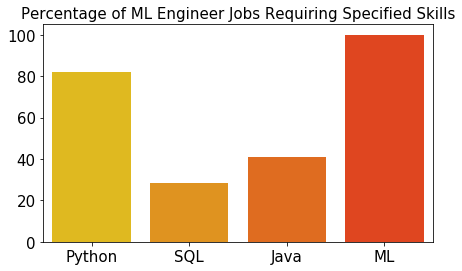

In [34]:
# Plotting percentages of job postings requiring specified skills
plt.figure(figsize=(7,4))
sb.barplot(y=skill_list_mleng,x=["Python","SQL","Java","ML"],palette="autumn_r")
plt.title("Percentage of ML Engineer Jobs Requiring Specified Skills",size=15)
plt.xticks(size=15)
plt.yticks(size=15)

In [35]:
# Define Data Engineer Position
data_engineer=all_data[(all_data["position"]=='Data Engineer')]

In [36]:
# Examine Data Engineers by city
dataeng_by_city=data_engineer.groupby(by="city").size().reset_index(name="job postings").sort_values(by="job postings",ascending=False)

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 <a list of 8 Text xticklabel objects>)

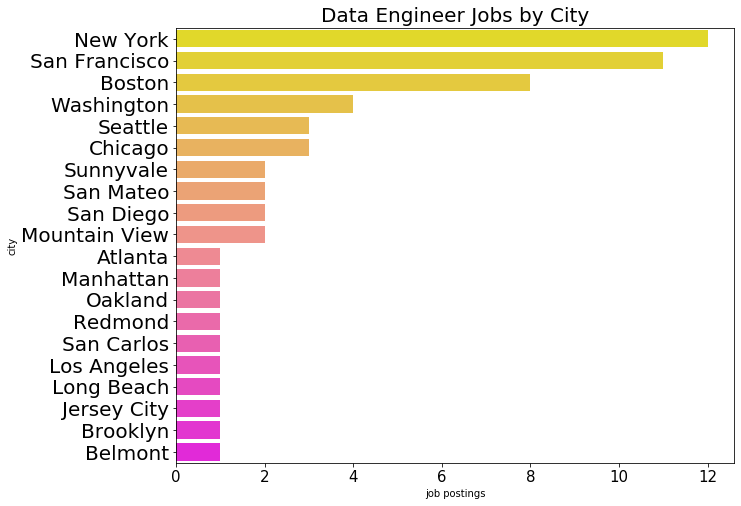

In [37]:
# Bar Plot Data Engineer Jobs by City (top20)
plt.figure(figsize=(10,8))
plt.yticks(size=20)
sb.barplot(y="city",x="job postings",data=dataeng_by_city.head(20),palette="spring_r")
plt.title("Data Engineer Jobs by City",size=20)
plt.xticks(size=15)

In [38]:
# Putting data engineer job posting descriptions in a list
data_engineer_skills=data_engineer.description.tolist()

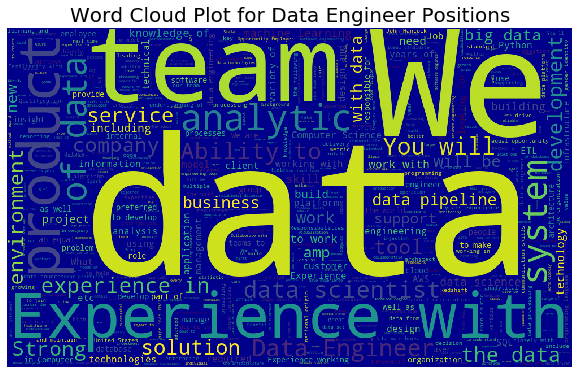

In [59]:
# Generating and plotting wordcloud for data engineer job postings
wordcloud = WordCloud(width = 1000, height = 600, background_color ='darkblue',contour_color='steelblue', max_words=500, min_font_size = 5).generate(desc_to_text(data_engineer_skills))
plt.figure(figsize=(20,5))
plt.imshow(wordcloud)
plt.title('Word Cloud Plot for Data Engineer Positions',size=20)
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()

In [40]:
# Calculating Percentages of job posting requiring specified skills (sql, python, java, ml) for data engineers, if they appear in the description
python_dataeng=data_engineer[data_engineer.description.str.contains("python|Python|PYTHON")].shape[0]/data_engineer.shape[0]*100
sql_dataeng=data_engineer[data_engineer.description.str.contains("SQL|sql")].shape[0]/data_engineer.shape[0]*100
java_dataeng=data_engineer[data_engineer.description.str.contains("java|Java|JAVA")].shape[0]/data_engineer.shape[0]*100
ml_dataeng=data_engineer[data_engineer.description.str.contains("machine|learning|ml|ML|machine Learning|Machine Learning|Machine learning")].shape[0]/data_engineer.shape[0]*100


In [41]:
# Skill_list to be used for values
skill_list_dataeng=[python_dataeng,sql_dataeng,java_dataeng,ml_dataeng]

(array([  0.,  20.,  40.,  60.,  80., 100.]),
 <a list of 6 Text yticklabel objects>)

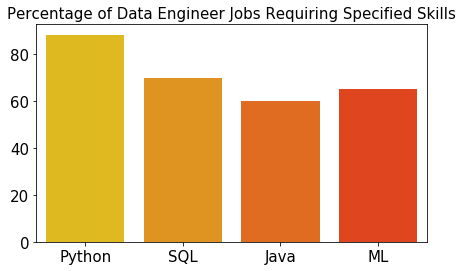

In [42]:
# Plotting percentages of job postings requiring specified skills
plt.figure(figsize=(7,4))
sb.barplot(y=skill_list_dataeng,x=["Python","SQL","Java","ML",],palette="autumn_r")
plt.title("Percentage of Data Engineer Jobs Requiring Specified Skills",size=15)
plt.xticks(size=15)
plt.yticks(size=15)

In [43]:
# Defining Data Analyst positions
data_analyst=all_data[(all_data["position"]=='Data Analyst')]

In [44]:
# Examine Data Analysts by city
da_by_city=data_analyst.groupby(by="city").size().reset_index(name="job postings").sort_values(by="job postings",ascending=False)


(array([0., 1., 2., 3., 4., 5., 6., 7., 8.]),
 <a list of 9 Text xticklabel objects>)

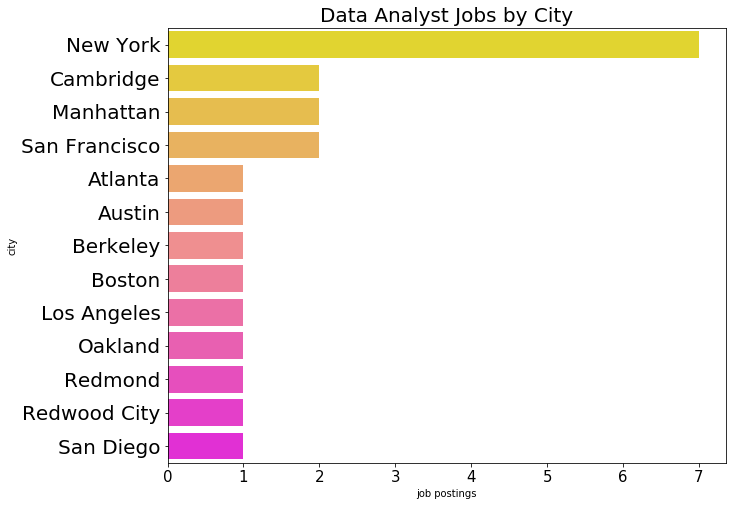

In [45]:
# Bar Plot Data Analyst Jobs by City (top20)
plt.figure(figsize=(10,8))
plt.yticks(size=20)
sb.barplot(y="city",x="job postings",data=da_by_city.head(20),palette="spring_r")
plt.title("Data Analyst Jobs by City",size=20)
plt.xticks(size=15)

In [56]:
# Putting data engineer job posting descriptions in a list
data_analyst_skills=data_analyst.description.tolist()

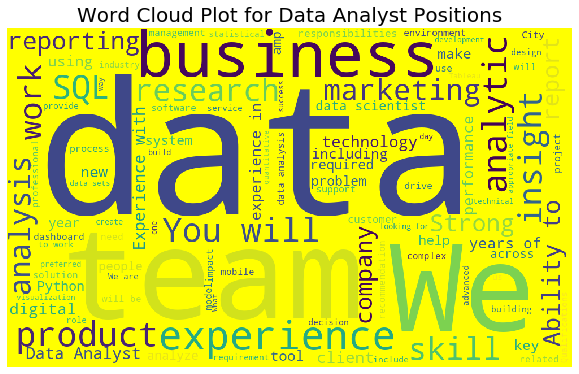

In [58]:
# Generating and plotting wordcloud for data analyst job postings
wordcloud = WordCloud(width = 1000, height = 600, background_color ='yellow',max_words=100,  min_font_size = 5).generate(desc_to_text(data_analyst_skills))
plt.figure(figsize=(20,5))
plt.imshow(wordcloud)
plt.title('Word Cloud Plot for Data Analyst Positions',size=20)
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()

In [60]:
# Calculating Percentages of job posting requiring specified skills (sql, python, java, ml) for data analysts, if they appear in the description
python_da=data_analyst[data_analyst.description.str.contains("python|Python|PYTHON")].shape[0]/data_analyst.shape[0]*100
sql_da=data_analyst[data_analyst.description.str.contains("SQL|sql")].shape[0]/data_analyst.shape[0]*100
java_da=data_analyst[data_analyst.description.str.contains("java|Java|JAVA")].shape[0]/data_analyst.shape[0]*100
ml_da=data_analyst[data_analyst.description.str.contains("machine|learning|ml|ML|machine Learning|Machine Learning|Machine learning")].shape[0]/data_analyst.shape[0]*100


In [61]:
# Skill_list to be used for values
skill_list_da=[python_da,sql_da,java_da,ml_da]

(array([  0.,  20.,  40.,  60.,  80., 100.]),
 <a list of 6 Text yticklabel objects>)

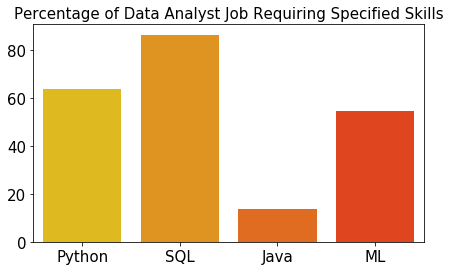

In [62]:
# Plotting percentages of job postings requiring specified skills
plt.figure(figsize=(7,4))
sb.barplot(y=skill_list_da,x=["Python","SQL","Java","ML"],palette='autumn_r')
plt.title("Percentage of Data Analyst Job Requiring Specified Skills",size=15)
plt.xticks(size=15)
plt.yticks(size=15)